## STEP 1 : Problem Statement
prediction on boston house dataset

In [2]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
type(boston)

sklearn.utils._bunch.Bunch

## STEP 2 : Read and load dataset

In [4]:
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [6]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['PRICE'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## STEP 3 : EDA 

In [7]:
# check the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
# check any missing value
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [9]:
# check correleation to check assumption:
# linearity
# multicollinearity
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

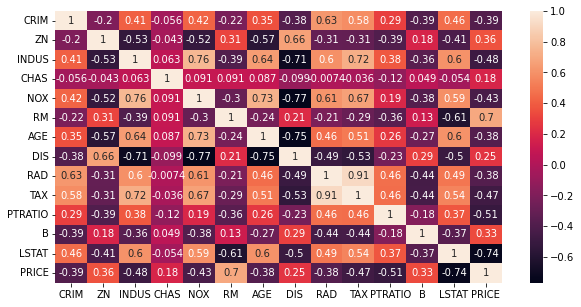

In [10]:
# let do visualization (correlation)
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [11]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

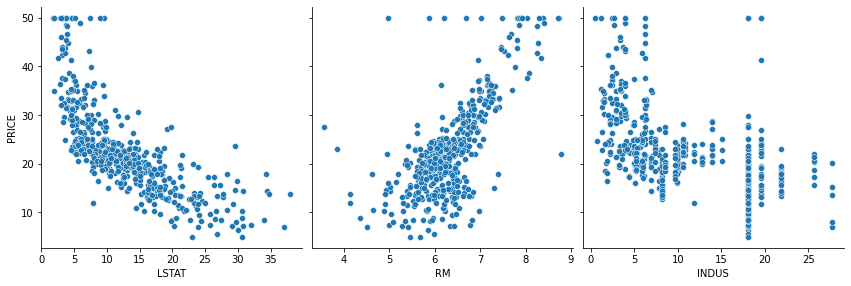

In [12]:
# to plot all the scatterplots in a single plot
sns.pairplot(df,x_vars=['LSTAT','RM','INDUS'],y_vars='PRICE',size=4,kind ='scatter')

In [13]:
# regresion plot 
# linearity in this feature


<AxesSubplot:xlabel='NOX', ylabel='DIS'>

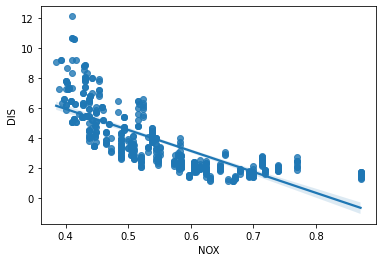

In [14]:
sns.regplot(x='NOX',y='DIS',data=df)

<AxesSubplot:xlabel='CHAS', ylabel='PRICE'>

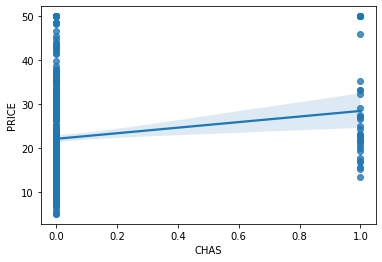

In [15]:
# No linearity 
sns.regplot(x='CHAS',y='PRICE',data=df)

In [16]:
# Splitting Independent and Dependent features

# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]

X = df.drop('PRICE',axis=1)
y = df['PRICE']

In [17]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(354, 13) (152, 13) (354,) (152,)


## STEP 4 : Feature Engineering

In [18]:
# Standardize the data
# internally we use d GDA our main aim to reach to global minin so need our features use the same unit/scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
# we use the same transformation to test data also, so we use only transform
# we can't use fit_transform() because we don't want model know much about our test data
X_test = scaler.transform(X_test)

In [21]:
# create pickle file for scaler data
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

## STEP 5 : Feature Selection 

## STEP 6 : Model Training 

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [23]:
# print all coeficients and intercepts
print(lin_reg.coef_)

[-1.252809    1.56150248 -0.16861008  0.37449384 -1.7776332   2.23783886
  0.3168073  -3.27712377  2.69471035 -2.10285702 -1.74689193  1.22356691
 -3.83454078]


In [24]:
print(lin_reg.intercept_)

21.971186440677965


In [25]:
# on which parameters model train
lin_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [26]:
# prediction with test data
y_pred = lin_reg.predict(X_test)
y_pred[:5]

array([31.4243217 , 31.96785487, 30.93785448, 22.34313349, 18.83846235])

### check linear regression Assumption
- Autocorelation
- Normality of residual
- Homoskedasticity

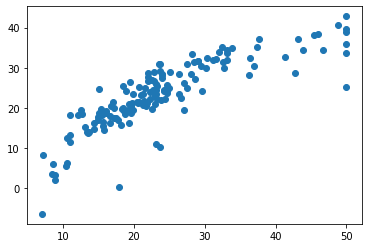

In [27]:
# plot scatter plot for prediction
plt.scatter(y_test,y_pred)

In [28]:
# calculate residual(Errors)
residual = y_test - y_pred
residual

305   -3.024322
193   -0.867855
65    -7.437854
349    4.256867
151    0.761538
         ...   
56    -1.086958
37    -2.322335
66    -6.966349
427   -0.578172
12     1.250985
Name: PRICE, Length: 152, dtype: float64

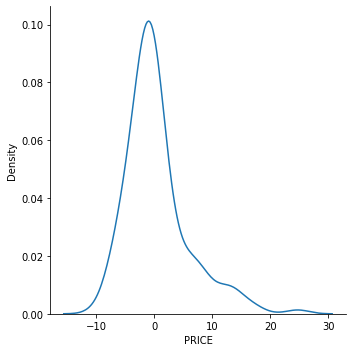

In [29]:
# plot for residual 
# some outlier present
sns.displot(residual,kind='kde')

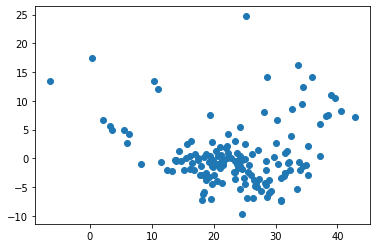

In [30]:
# scatter plot with pred and residual
# uniform distribution

plt.scatter(y_pred,residual)

## STEP 7 : Model Evaluation

In [31]:
# Evaluation metrics or performance metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [32]:
mse = mean_squared_error(y_test,y_pred)
print(f'MSE : {mse}')

mae = mean_absolute_error(y_test,y_pred)
print(f'MAE : {mae}')

rmse = np.sqrt(mse)
print(f'RMSE : {rmse}')

r2 = r2_score(y_test,y_pred)
print(f'R2_Score : {r2}')


MSE : 29.326596526123264
MAE : 3.7071271372718138
RMSE : 5.415403634644722
R2_Score : 0.6996255772983113


In [33]:
# n = no of sampole
# p = No pf features
n,p = X_train.shape
n = X_train.shape[0]
p = X_train.shape[1]
print(n,p)

354 13


In [34]:
# adjusted R2_score value

adj_r2 = 1 -((1-r2)*(n-1)/(n-p-1))
print(f'Adj_R2_Score : {adj_r2}')

Adj_R2_Score : 0.6881406729008939


### Prediction on New data 

In [35]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [36]:
new = boston.data[0].reshape(1,-1)
new

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [37]:
#  we are getting negative value here because we didn't scale this value
lin_reg.predict(new)

array([-109.25007243])

In [38]:
# scaling this value
scale_data = scaler.transform(new)
scale_data

array([[-0.43055341,  0.27857825, -1.32566533, -0.24470439, -0.16542775,
         0.48012722, -0.1390934 ,  0.14327903, -0.9965099 , -0.69698896,
        -1.51638705,  0.4497093 , -1.13515486]])

In [39]:
lin_reg.predict(scale_data)

array([30.26475072])

### prediction on testing data 
- we need to scale user input data if we already train our model on scaled data

In [40]:
X_test[0]

array([-0.42460396,  0.90312987, -1.34436981, -0.24470439, -0.73348387,
        0.54153943, -0.39292143, -0.19684797, -0.3226522 , -1.12742705,
       -0.07624586,  0.41224123, -0.57388732])

In [41]:
X_test[0].shape

(13,)

In [42]:
X_test[0].ndim

1

In [43]:
# reshape it to make it 2D
data = X_test[0].reshape(1,-1)
data

array([[-0.42460396,  0.90312987, -1.34436981, -0.24470439, -0.73348387,
         0.54153943, -0.39292143, -0.19684797, -0.3226522 , -1.12742705,
        -0.07624586,  0.41224123, -0.57388732]])

In [44]:
X_test[0].reshape(1,-1).shape

(1, 13)

In [45]:
# to check prediction on new data
lin_reg.predict(data)

array([31.4243217])

In [46]:
y_test[:5] # actual

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
Name: PRICE, dtype: float64

## Creating pickle file for Deployment 

In [47]:
# write pickle file
# pickle file serialize format
import pickle
pickle.dump(lin_reg,open('lin_model.pkl','wb'))

In [48]:
# load pickle file
# Deserialize it
pkl_model = pickle.load(open('lin_model.pkl','rb'))

In [49]:
pkl_model.predict(data)

array([31.4243217])